# K_modas(De cero)

In [ ]:
import numpy as np

In [ ]:
data = np.array([['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']])

In [ ]:
#Modas inciales
modes = np.array([['x', 'y', 'z'],
                  ['z', 'y', 'x']])
data.shape

(8, 3)

In [ ]:
clusters = np.zeros(data.shape[0])
distances = []
for i, object in enumerate(data):
    dist = [sum(object != mode) for mode in modes]
    distances.append(dist)
    clusters[i] = np.argmin(dist)
print(clusters)
distances

[0. 1. 1. 0. 0. 1. 0. 1.]


[[0, 2], [3, 2], [3, 1], [2, 3], [2, 3], [2, 0], [2, 3], [2, 0]]

In [ ]:
# Actrualizar modas
for i in range(len(modes)):
    points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
    print(points)
    for h in range(modes.shape[1]):
        vals, counts = np.unique(points[:,h], return_counts=True)
        modes[i,h] = vals[np.argmax(counts)]
modes

[['x' 'y' 'z']
 ['y' 'z' 'z']
 ['x' 'z' 'y']
 ['x' 'x' 'y']]
[['y' 'z' 'x']
 ['z' 'x' 'x']
 ['z' 'y' 'x']
 ['z' 'y' 'x']]


array([['x', 'z', 'y'],
       ['z', 'y', 'x']], dtype='<U1')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

In [ ]:
data = np.array([['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']])

In [ ]:
#Modelo con 2 grupos
km = KModes(n_clusters=2, init='random', n_init=5, verbose= True)
grupos = km.fit_predict(data)
grupos, km.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 10.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 8.0
Run 3, iteration: 2/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 12.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 8.0
Run 5, iteration: 2/100, moves: 0, cost: 8.0
Best run was number 3


(array([0, 0, 1, 0, 0, 1, 0, 1], dtype=uint16),
 array([['x', 'z', 'y'],
        ['z', 'y', 'x']], dtype='<U1'))

In [ ]:
col_cabello = np.array(['rubio', 'castaño', 'pelirrojo', 'negro', 'castaño', 'negro', 'pelirrojo', 'rubio'])
col_ojos = np.array(['azul', 'gris', 'verde', 'café', 'azul', 'gris', 'azul', 'café'])
tipo_cabello = np.array(['lacio', 'chino', 'ondulado', 'ondulado', 'chino', 'chino', 'ondulado', 'lacio'])
personas = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':personas, 'col_cabello':col_cabello, 'col_ojos':col_ojos, 'tipo_cabello':tipo_cabello})
data = data.set_index('person')
data

,col_cabello,col_ojos,tipo_cabello
person,,,
P1,rubio,azul,lacio
P2,castaño,gris,chino
P3,pelirrojo,verde,ondulado
P4,negro,café,ondulado
P5,castaño,azul,chino
P6,negro,gris,chino
P7,pelirrojo,azul,ondulado
P8,rubio,café,lacio


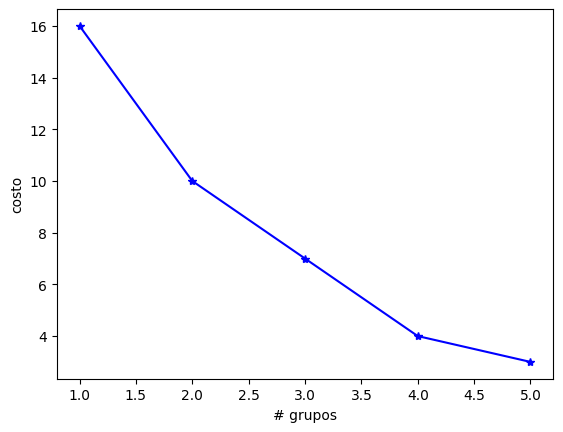

In [ ]:
#Grafica de codo
costo = [] #El nuemero de diferencias entre tu muestra y la moda actual
k = range(1,6)
for nc in k:
  km = KModes(n_clusters=nc, init='random', n_init=5, verbose= False)
  km.fit_predict(data)
  costo.append(km.cost_)

plt.plot(k,costo, 'b*-')
plt.xlabel('# grupos')
plt.ylabel('costo')
plt.show()

In [ ]:
# 3 grupos
km = KModes(n_clusters=3, init='random', n_init=5, verbose= False)
grupos = km.fit_predict(data)
grupos, km.cluster_centroids_

(array([2, 0, 1, 1, 0, 0, 1, 2], dtype=uint16),
 array([['castaño', 'gris', 'chino'],
        ['pelirrojo', 'verde', 'ondulado'],
        ['rubio', 'azul', 'lacio']], dtype='<U9'))

In [ ]:
data.insert(0, 'grupo', grupos)
data

,grupo,col_cabello,col_ojos,tipo_cabello
person,,,,
P1,2,rubio,azul,lacio
P2,0,castaño,gris,chino
P3,1,pelirrojo,verde,ondulado
P4,1,negro,café,ondulado
P5,0,castaño,azul,chino
P6,0,negro,gris,chino
P7,1,pelirrojo,azul,ondulado
P8,2,rubio,café,lacio
